In [84]:
pip install nibabel

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


Q1) How can we read and load NIfTI and DICOM files in Python?

In [ ]:
import nibabel as nib
img1=nib.load(r"C:\Users\Rakshita\Downloads\sub-65304_ses-1_acq-t1csmp2ragesag06mmUNIDEN_T1w.nii")
#load nifti files

In [116]:
import pydicom as di
ds=di.dcmread(r"C:\Users\Rakshita\Downloads\archive (2)\Neurohacking_data-0.0\Neurohacking_data-0.0\BRAINIX\DICOM\T1\BRAINIX_DICOM_T1_IM-0001-0022.dcm")


Q2) What is the internal structure and metadata of these formats?

In [117]:
print(ds.PatientName)
print(ds.PatientID)
print(ds.Modality)
print(ds.StudyDate)
print(ds.SliceThickness)
print(ds.PixelSpacing)
#metadata of dcm files

BRAINIX
5Yp0E
MR
20061201
5.0
[0.46875, 0.46875]


In [ ]:
print(img1.shape)
print(img1.affine)
print(img1.header.get_zooms())
print(img1.get_data_dtype())
print(img1.header)
#internal structure of nifti files

(256, 384, 384)
[[ 6.26228750e-01 -5.86845390e-02 -3.49271894e-02 -6.36599960e+01]
 [ 6.13057874e-02  6.20829523e-01  3.86882909e-02 -1.04477142e+02]
 [ 3.13100182e-02 -4.18554321e-02  6.22822821e-01 -1.21944519e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
(0.63, 0.625, 0.625)
int16
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 54
dim             : [  3 256 384 384   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.    0.63  0.625 0.625 6.    0.    0.    0.   ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset 

Q3) How do we stack DICOM slices into a 3D volume?

In [ ]:
import os
#Loading the DICOM files from the folder
folder = r"C:\Users\Rakshita\Downloads\archive (2)\Neurohacking_data-0.0\Neurohacking_data-0.0\BRAINIX\DICOM\T1" 
files = [pydicom.dcmread(os.path.join(folder, f)) 
         for f in os.listdir(folder) if f.endswith(".dcm")]

#Sorting using instance number 
files.sort(key=lambda x: int(x.InstanceNumber))  

#Stacking to 3D numpy array
volume = np.stack([f.pixel_array for f in files])

#(slices,height,width)
volume.shape


(22, 512, 512)

Q4. How can we visualize anatomical planes from a 3D image volume?

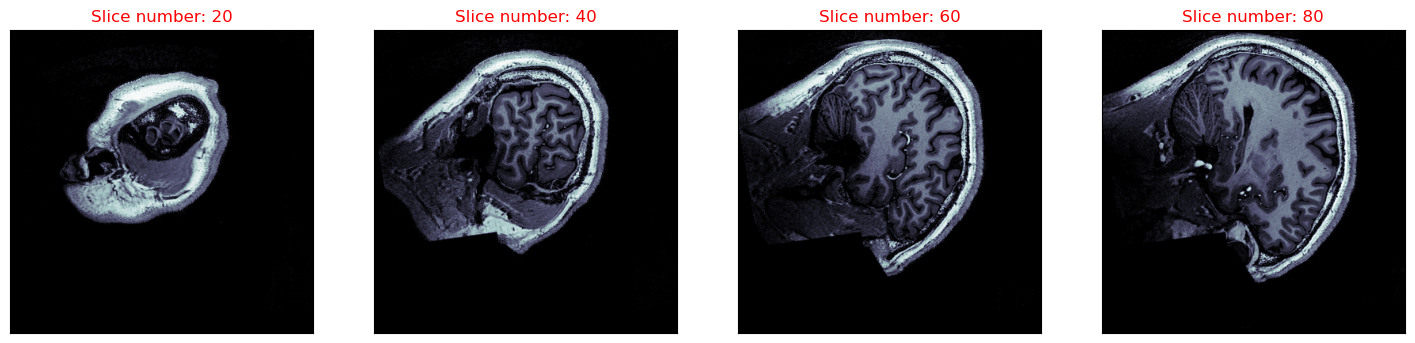

In [ ]:
#saggital view slices(nii)
fig, ax = plt.subplots(1, 4, figsize=[18, 18])
n = 0
slice_idx = 20
data=img1.get_fdata()
for _ in range(4):
    ax[n].imshow(data[slice_idx,:,:], cmap='bone')  
    ax[n].set_xticks([])
    ax[n].set_yticks([])
    ax[n].set_title(f'Slice number: {slice_idx}', color='r')
    n += 1
    slice_idx += 20

plt.show()


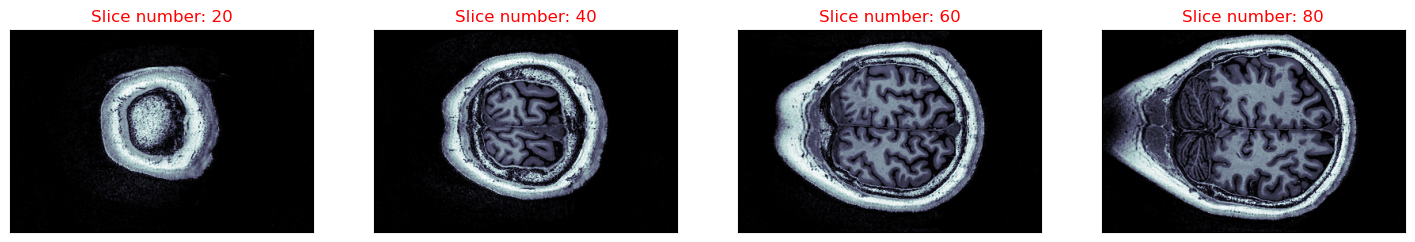

In [ ]:
#axial slices(nii)
fig, ax = plt.subplots(1, 4, figsize=[18, 18])
n = 0
slice_idx = 20
for _ in range(4):
    ax[n].imshow(data[:,slice_idx,:], cmap='bone')  
    ax[n].set_xticks([])
    ax[n].set_yticks([])
    ax[n].set_title(f'Slice number: {slice_idx}', color='r')
    n += 1
    slice_idx += 20

plt.show()


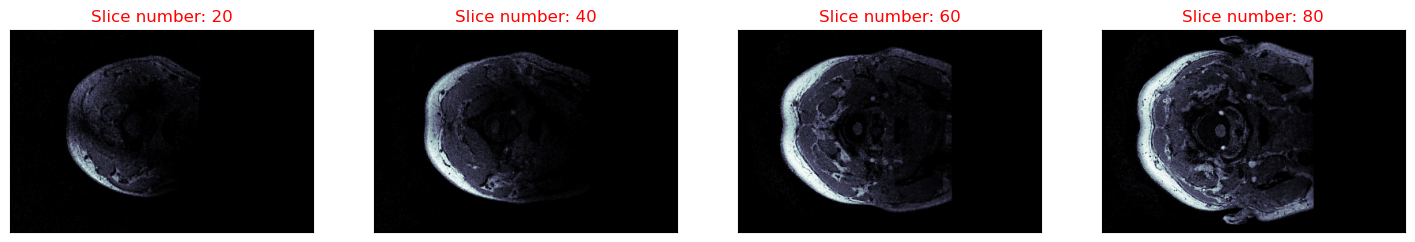

In [ ]:
#coronal slices(nii)
fig, ax = plt.subplots(1, 4, figsize=[18, 18])
n = 0
slice_idx = 20
for _ in range(4):
    ax[n].imshow(data[:,:,slice_idx], cmap='bone')  
    ax[n].set_xticks([])
    ax[n].set_yticks([])
    ax[n].set_title(f'Slice number: {slice_idx}', color='r')
    n += 1
    slice_idx += 20

plt.show()


In [ ]:
pip install pydicom

Note: you may need to restart the kernel to use updated packages.


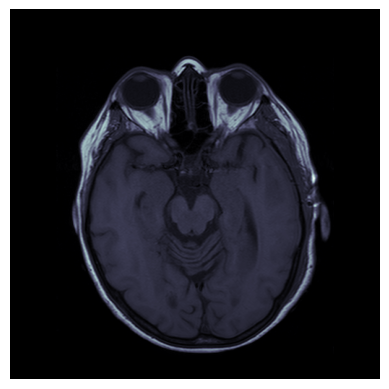

In [110]:
plt.imshow(volume[14], cmap='bone')
plt.axis('off')
plt.show()
#a slice from the 3D-image

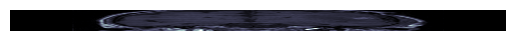

In [112]:
plt.imshow(volume[:,256,:], cmap='bone')
plt.axis('off')
plt.show()
#a slice from the 3D-image

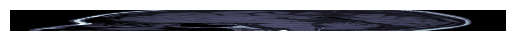

In [115]:
plt.imshow(volume[:,:,256], cmap='bone')
plt.axis('off')
plt.show()
#a slice from the 3D-image

Q5) How do we interpret image orientation?

In [118]:
img1.affine

array([[ 6.26228750e-01, -5.86845390e-02, -3.49271894e-02,
        -6.36599960e+01],
       [ 6.13057874e-02,  6.20829523e-01,  3.86882909e-02,
        -1.04477142e+02],
       [ 3.13100182e-02, -4.18554321e-02,  6.22822821e-01,
        -1.21944519e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

Q6) What are the key differences between DICOM and NIfTI?

1)Uses:
    DICOM is used in clinical environments like hospitals.
    NIfTI is generally used in research environments(neuroimaging).

2)Metadata structure:
    DICOM has detailed clinical data like details of patient,date of scan etc
    NIfTI doesnt have such kind of clinical data but has spatial information like affine and other parameters.

3)File Formats:
    DICOM:Multiple files containing one slice each are stacked to get one 3D image
    NIfTI:All slices stored in one file 

4)Python:
    DICOM:Multiple files loaded using pydicom and stacked to get a 3D volume.
    NIfTI:Easier to load and work with